In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [74]:
df = pd.read_csv('houses_to_rent.csv')

In [75]:
df.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [76]:
df = df.drop('Unnamed: 0',axis=1)

In [77]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            6080 non-null   int64 
 1   area            6080 non-null   int64 
 2   rooms           6080 non-null   int64 
 3   bathroom        6080 non-null   int64 
 4   parking spaces  6080 non-null   int64 
 5   floor           6080 non-null   object
 6   animal          6080 non-null   object
 7   furniture       6080 non-null   object
 8   hoa             6080 non-null   object
 9   rent amount     6080 non-null   object
 10  property tax    6080 non-null   object
 11  fire insurance  6080 non-null   object
 12  total           6080 non-null   object
dtypes: int64(5), object(8)
memory usage: 617.6+ KB


In [79]:
df['floor'].value_counts()

-     1555
1      573
3      401
2      379
4      319
5      314
6      306
8      291
7      287
9      224
10     213
11     193
12     179
13     143
14     141
15     107
16      89
17      73
18      69
19      47
20      36
21      30
23      26
25      23
22      21
24      11
27       7
28       6
26       6
29       4
51       1
31       1
99       1
32       1
35       1
68       1
85       1
Name: floor, dtype: int64

In [80]:
df['floor'] = df['floor'].replace('-',np.nan)

In [86]:
df['floor'] = pd.to_numeric(df['floor'])

df['floor'] = df['floor'].fillna(df['floor'].mean())

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            6080 non-null   int64  
 1   area            6080 non-null   int64  
 2   rooms           6080 non-null   int64  
 3   bathroom        6080 non-null   int64  
 4   parking spaces  6080 non-null   int64  
 5   floor           6080 non-null   float64
 6   animal          6080 non-null   object 
 7   furniture       6080 non-null   object 
 8   hoa             6080 non-null   object 
 9   rent amount     6080 non-null   object 
 10  property tax    6080 non-null   object 
 11  fire insurance  6080 non-null   object 
 12  total           6080 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 617.6+ KB


In [88]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa', 'rent amount', 'property tax',
       'fire insurance', 'total'],
      dtype='object')

In [89]:
# Remove R$ 
df[[ 'hoa', 'rent amount', 'property tax',
       'fire insurance', 'total']] = df[[ 'hoa', 'rent amount', 'property tax',
       'fire insurance', 'total']].apply(lambda x:x.str[2:])

In [90]:
def remove(string):
    new= ""
    for i in string:
        if i.isdigit():
            new = new + i
    return new

In [91]:
df['hoa'] = pd.to_numeric(df['hoa'].apply(remove))
df['rent amount'] = pd.to_numeric(df['rent amount'].apply(remove))
df['property tax'] = pd.to_numeric(df['property tax'].apply(remove))
df['fire insurance'] = pd.to_numeric(df['fire insurance'].apply(remove))
df['total'] = pd.to_numeric(df['total'].apply(remove))

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            6080 non-null   int64  
 1   area            6080 non-null   int64  
 2   rooms           6080 non-null   int64  
 3   bathroom        6080 non-null   int64  
 4   parking spaces  6080 non-null   int64  
 5   floor           6080 non-null   float64
 6   animal          6080 non-null   object 
 7   furniture       6080 non-null   object 
 8   hoa             5878 non-null   float64
 9   rent amount     6080 non-null   int64  
 10  property tax    6053 non-null   float64
 11  fire insurance  6080 non-null   int64  
 12  total           6080 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 617.6+ KB


In [94]:
df['hoa'] = df['hoa'].fillna(df['hoa'].mean())
df['property tax'] = df['property tax'].fillna(df['property tax'].mean())

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            6080 non-null   int64  
 1   area            6080 non-null   int64  
 2   rooms           6080 non-null   int64  
 3   bathroom        6080 non-null   int64  
 4   parking spaces  6080 non-null   int64  
 5   floor           6080 non-null   float64
 6   animal          6080 non-null   object 
 7   furniture       6080 non-null   object 
 8   hoa             6080 non-null   float64
 9   rent amount     6080 non-null   int64  
 10  property tax    6080 non-null   float64
 11  fire insurance  6080 non-null   int64  
 12  total           6080 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 617.6+ KB


In [110]:
df['floor'] = df['floor'].astype('int')

total             1.000000
property tax      0.741658
hoa               0.545735
rent amount       0.542891
fire insurance    0.524382
bathroom          0.386854
parking spaces    0.313975
rooms             0.310166
area              0.141064
city              0.121799
floor             0.093928
Name: total, dtype: float64


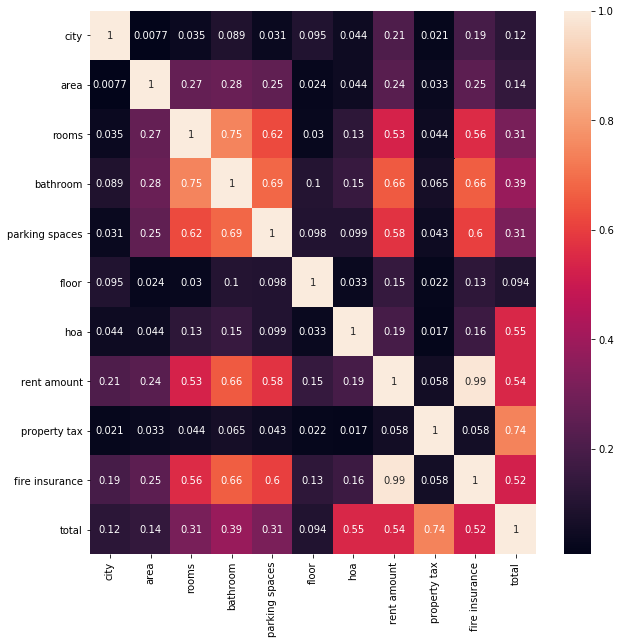

In [111]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
print(df.corr()['total'].sort_values(ascending=False))

In [112]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa', 'rent amount', 'property tax',
       'fire insurance', 'total'],
      dtype='object')

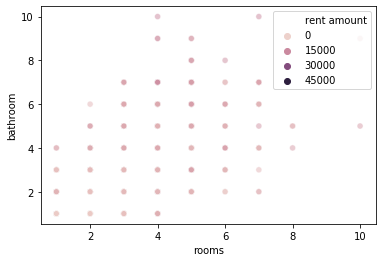

In [113]:
sns.scatterplot(x='rooms',y='bathroom',data=df,hue='rent amount',alpha=0.5)

In [114]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,7,acept,furnished,0.0,8000,1000.0,121,9121
1,0,64,2,1,1,10,acept,not furnished,540.0,820,122.0,11,1493
2,1,443,5,5,4,3,acept,furnished,4172.0,7000,1417.0,89,12680
3,1,73,2,2,1,12,acept,not furnished,700.0,1250,150.0,16,2116
4,1,19,1,1,0,7,not acept,not furnished,0.0,1200,41.0,16,1257


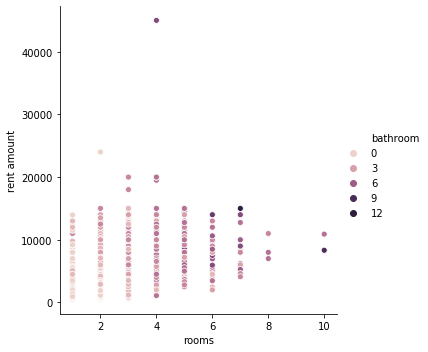

In [121]:
sns.relplot(x='rooms',y='rent amount',data=df,hue='bathroom')

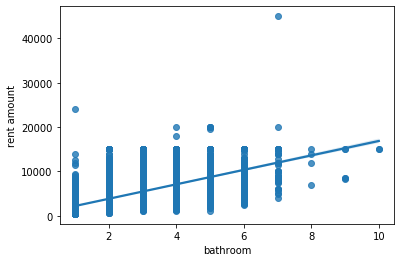

In [116]:
sns.regplot(x='bathroom',y='rent amount',data=df)

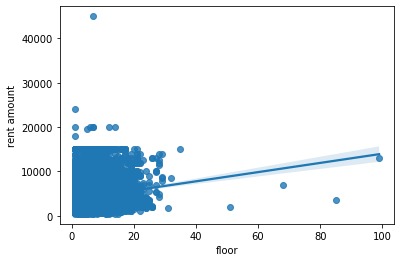

In [117]:
sns.regplot(x='floor',y='rent amount',data=df)

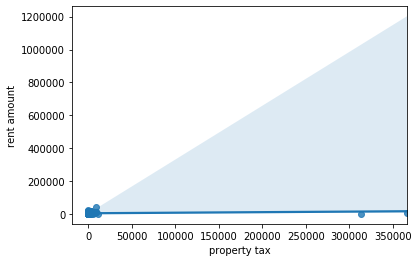

In [119]:
sns.regplot(x='property tax',y='rent amount',data=df)

Text(0.5, 1, 'Hoa-Total Relationship')

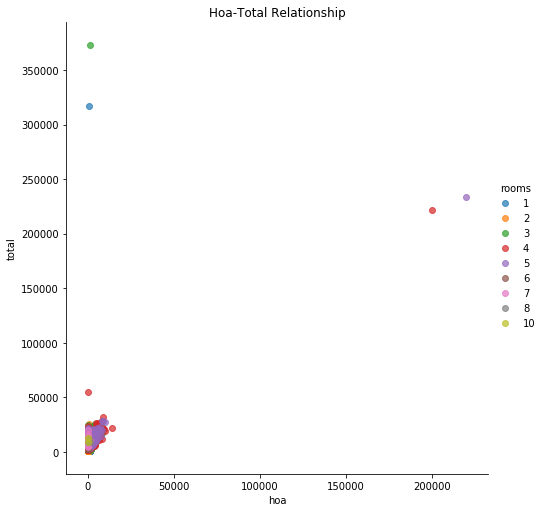

In [126]:
g = sns.FacetGrid(df,hue='rooms',size=7)
g.map(plt.scatter,'hoa','total',alpha=0.7)
g.add_legend()
plt.title('Hoa-Total Relationship')

Text(0.5, 1, 'Insurance-Total Relationship')

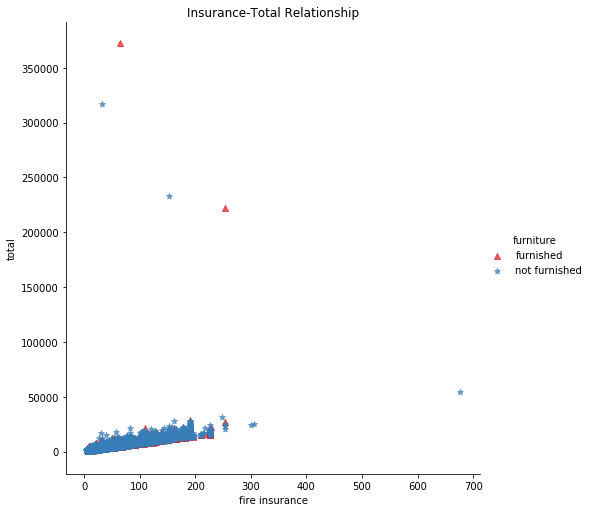

In [132]:
g = sns.FacetGrid(df,hue='furniture',palette='Set1', size=7,height=5,hue_kws={'marker':['^',"*"]})
g.map(plt.scatter,'fire insurance','total',alpha=0.7)
g.add_legend()
plt.title('Insurance-Total Relationship')

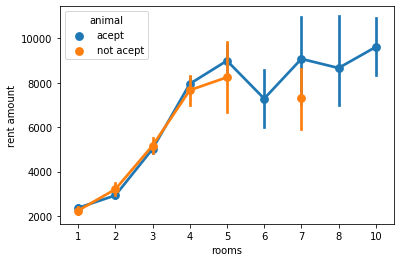

In [135]:
sns.pointplot(x='rooms',y='rent amount',data=df,hue='animal')

In [137]:
df = pd.get_dummies(df)

In [143]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,hoa,rent amount,property tax,fire insurance,total,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished
0,1,240,3,3,4,7,0.0,8000,1000.0,121,9121,1,0,1,0
1,0,64,2,1,1,10,540.0,820,122.0,11,1493,1,0,0,1
2,1,443,5,5,4,3,4172.0,7000,1417.0,89,12680,1,0,1,0
3,1,73,2,2,1,12,700.0,1250,150.0,16,2116,1,0,0,1
4,1,19,1,1,0,7,0.0,1200,41.0,16,1257,0,1,0,1


In [146]:
df['city'] = df['city'].map({1:'yes',0:'no'})

In [147]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,hoa,rent amount,property tax,fire insurance,total,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished
0,yes,240,3,3,4,7,0.0,8000,1000.0,121,9121,1,0,1,0
1,no,64,2,1,1,10,540.0,820,122.0,11,1493,1,0,0,1
2,yes,443,5,5,4,3,4172.0,7000,1417.0,89,12680,1,0,1,0
3,yes,73,2,2,1,12,700.0,1250,150.0,16,2116,1,0,0,1
4,yes,19,1,1,0,7,0.0,1200,41.0,16,1257,0,1,0,1


In [148]:
df = pd.get_dummies(df)

In [149]:
df.head()

,area,rooms,bathroom,parking spaces,floor,hoa,rent amount,property tax,fire insurance,total,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished,city_no,city_yes
0,240,3,3,4,7,0.0,8000,1000.0,121,9121,1,0,1,0,0,1
1,64,2,1,1,10,540.0,820,122.0,11,1493,1,0,0,1,1,0
2,443,5,5,4,3,4172.0,7000,1417.0,89,12680,1,0,1,0,0,1
3,73,2,2,1,12,700.0,1250,150.0,16,2116,1,0,0,1,0,1
4,19,1,1,0,7,0.0,1200,41.0,16,1257,0,1,0,1,0,1


In [151]:
x = df.drop('total',axis=1)
y = df['total']

In [161]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)
scale = MinMaxScaler()
xtrain = scale.fit_transform(xtrain)
xtest = scale.transform(xtest)

In [169]:
# Lasso regression
lasso_pip = Pipeline([
               ('kb',SelectKBest(chi2)),
               ('pca',PCA()),
               ('lasso',Lasso(random_state=1))])
lasso = GridSearchCV(lasso_pip,param_grid={'kb__k':[2,4,6,8,10],
                                         'pca__n_components':[0.3,0.5,0.8],
                                         'lasso__alpha':[0.001,0.01,0.1,1,3,7,10],
                                         'lasso__normalize':[False,True]},cv=5)
lasso.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kb',
                                        SelectKBest(k=10,
                                                    score_func=<function chi2 at 0x000001FD39EE7678>)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, p...
                                              precompute=Fal

In [170]:
print(lasso.score(xtrain,ytrain))
print(lasso.score(xtest,ytest))
lasso.best_params_

0.03119170052667697
0.09343185328322325


{'kb__k': 10,
 'lasso__alpha': 0.001,
 'lasso__normalize': False,
 'pca__n_components': 0.8}

In [171]:
# Ridge Regression
ridge_pip = Pipeline([
               ('kb',SelectKBest(chi2)),
               ('pca',PCA()),
               ('ridge',Ridge(random_state=1))])
ridge = GridSearchCV(ridge_pip,param_grid={'kb__k':[2,4,6,8,10],
                                         'pca__n_components':[0.3,0.5,0.8],
                                         'ridge__alpha':[0.001,0.01,0.1,1,3,7,10],
                                         'ridge__normalize':[False,True]},cv=5)
ridge.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kb',
                                        SelectKBest(k=10,
                                                    score_func=<function chi2 at 0x000001FD39EE7678>)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False, random_state=1,
                                              sol

In [172]:
print(ridge.score(xtrain,ytrain))
print(ridge.score(xtest,ytest))
ridge.best_params_

0.03119168434721964
0.09344783915591637


{'kb__k': 10,
 'pca__n_components': 0.8,
 'ridge__alpha': 1,
 'ridge__normalize': False}

In [227]:
# Random Forest Regression
rfr = RandomForestRegressor(n_estimators=100,random_state=1).fit(xtrain,ytrain)
print(rfr.score(xtrain,ytrain))
print(rfr.score(xtest,ytest))

0.9755461407037936
0.9609838319543


Text(0.5, 1.0, 'Feature selected by Random Forest Model')

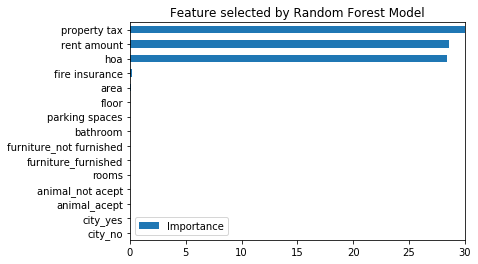

In [228]:
newdf = df.drop('total',axis=1)
feature = pd.DataFrame(rfr.feature_importances_*100,index=
                       newdf.columns)
feature.columns = ['Importance']
feature.sort_values(by='Importance').plot(kind='barh')
plt.xlim(0,30)
plt.title('Feature selected by Random Forest Model')

In [229]:
pred = rfr.predict(xtest)
mean_absolute_error(ytest,pred)

144.6503782894737

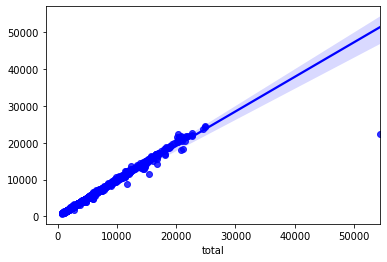

In [248]:
sns.regplot(ytest,pred,color='blue')

In [251]:
sm.add_constant(df)
lm = sm.OLS(y,x)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.519e+05
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:29:33   Log-Likelihood:                -40890.
No. Observations:                6080   AIC:                         8.181e+04
Df Residuals:                    6067   BIC:                         8.189e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
area                    -3.408e-05      0.007     -0.005      0.996      -0.014       0.014
rooms                       2.8777      3.651      0.788      0.431      -4.279      10.034
bathroom                    4.3554      3.208      1.358      0.175      -1.934      10.645
parking spaces             -3.2461      2.373     -1.368      0.171      -7.898       1.406
floor                       0.7380      0.510      1.448      0.148      -0.261       1.737
hoa                         0.9990      0.001   1485.298      0.000       0.998       1.000
rent amount                 1.0432      0.005    227.336      0.000       1.034       1.052
property tax                1.0003      0.000   2392.961      0.000       0.999       1.001
fire insurance             -2.2356      0.335     -6.675      0.000      -2.892      -1.579
animal_acept               -2.8909      3.930     -0.736      0.462     -10.596       4.814
animal_not acept          -31.9086      4.254     -7.501      0.000     -40.247     -23.570
furniture_furnished        -9.2134      4.394     -2.097      0.036     -17.827      -0.600
furniture_not furnished   -25.5861      3.692     -6.931      0.000     -32.823     -18.349
city_no                    -5.3342      5.299     -1.007      0.314     -15.722       5.054
city_yes                  -29.4653      4.022     -7.325      0.000     -37.351     -21.580
==============================================================================
Omnibus:                     5775.417   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           155636.552
Skew:                          -4.882   Prob(JB):                         0.00
Kurtosis:                      25.782   Cond. No.                     7.68e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.23e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""